In [41]:
import os
import numpy as np
import torch
import cv2
import manga109api
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import easyocr
from PIL import Image, ImageDraw, ImageFont
from googletrans import Translator
translator = Translator(service_urls=['translate.google.com'])

In [34]:
def text_wrap(text, font, max_width):
        lines = []
        if font.getsize(text)[0]  <= max_width:
            lines.append(text)
        else:
            #split the line by spaces to get words
            words = text.split(' ')
            i = 0
            # append every word to a line while its width is shorter than the image width
            while i < len(words):
                line = ''
                while i < len(words) and font.getsize(line + words[i])[0] <= max_width:
                    line = line + words[i]+ " "
                    i += 1
                if not line:
                    line = words[i]
                    i += 1
                lines.append(line)
        return lines

In [2]:
image_base_path = "F:\\Datasets\\Manga109\\images\\"
manga109_root_dir = "F:\\Datasets\\Manga109"
p = manga109api.Parser(root_dir=manga109_root_dir)
book = "ARMS"
page_index = 19

In [29]:
IMAGE_PATH = p.img_path(book=book, index=page_index)
reader = easyocr.Reader(['ja'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [30]:
result = reader.readtext(IMAGE_PATH,paragraph="False")

In [ ]:
## Google Translate
for box in result:
    translated = translator.translate(box[1], dest = "en", src="ja")
    box.append(translated.text)

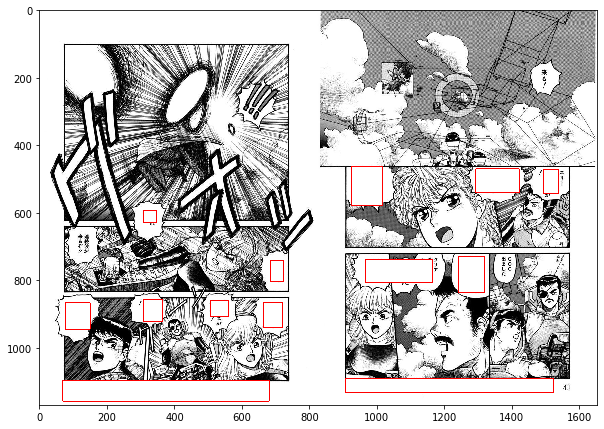

In [117]:
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for box in result:
    if len(box[1]) < 2:
        continue
    start_point = box[0][0]
    end_point = box[0][2]
    color = (255, 0, 0)
    thickness = 2
    img[start_point[1] : end_point[1], start_point[0] : end_point[0]] = 255
    img = cv2.rectangle(img, start_point, end_point, color, thickness)
plt.figure(figsize=(10,12)) 
plt.imshow(img)

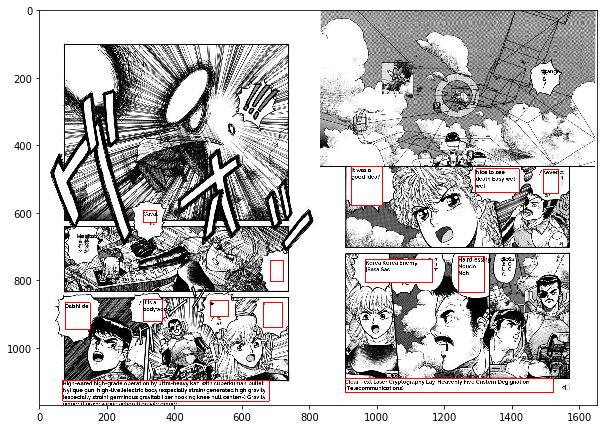

In [118]:
im_pil = Image.fromarray(img)
draw = ImageDraw.Draw(im_pil)
font = ImageFont.truetype('Raleway-Bold.ttf', size=16)
line_height = font.getsize('hg')[1]
color = 'rgb(0, 0, 0)'
for box in result:
    max_width = box[0][1][0] - box[0][0][0]
    text = box[2]
    lines = text_wrap(text, font, max_width)
    x = box[0][0][0]
    y = box[0][0][1]
    for line in lines:
        draw.text((x, y), line, fill=color, font=font)
        y = y + line_height 
plt.figure(figsize=(10,12)) 
plt.imshow(im_pil)

In [120]:
im_pil.save('translated.jpg')